In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import scipy.stats
import array
import sympy
from sympy import *
c=299792458
e=1.602e-19

In [17]:
def line(x,a,b):
    return a*(x-b)
def fittoline(data,guesses,a,b,col,title):
    x = data[a:b,0]
    y = data[a:b,1]
    init_vals = [guesses[0],guesses[1]]
    best_vals,covar = curve_fit(line,x,y,p0=init_vals)
    x1 = np.linspace(data[a,0],data[b,0],100)
    #x1 = np.linspace(0,data[len(data)-1,0],100)
    y1 = np.zeros(100)
    for i in range(0,100):
        y1[i]=line(x1[i],best_vals[0],best_vals[1])
    plt.figure(figsize = (2,2))
    plt.plot(x1,y1,col)
    plt.title(title)
    plt.xlabel('')
    plt.ylabel('')
    plt.scatter(data[:,0],data[:,1],c='black',s=2)
    err = np.sqrt(np.diag(covar))
    return best_vals,err
def exp(x,I,k):
    return I*(np.exp(x*k))
def fittoexp(data,guesses,a,b,col,title):
    #plt.figure(figsize=(10,5))
    x = data[a:b,0]
    y = data[a:b,1]
    init_vals = [guesses[0],guesses[1]]
    best_vals,covar = curve_fit(exponential,x,y,p0=init_vals)
    x1 = np.linspace(data[a,0],data[b,0],100)
    #x1 = np.linspace(0,data[len(data)-1,0],100)
    y1 = np.zeros(100)
    for i in range(0,100):
        y1[i]=exp(x1[i],best_vals[0],best_vals[1])
    plt.plot(x1,y1,col)
    plt.title(title,size=15)
    plt.xlabel('$V_{BE}$ (V)',size=15)
    plt.ylabel('$I_c$ (A)',size=15)
    plt.scatter(data[a:b,0],data[a:b,1],c='black',s=1)
    err = np.sqrt(np.diag(covar))
    return best_vals,err
def p10(x,a,b,c,d,e,f,g,h,i,j,k):
    return a+b*x+c*x**2+d*x**3+e*x**4+f*x**5+g*x**6+h*x**7+i*x**8+j*x**9+k*x**10
def fittop10(data,guesses,a,b,col,title):
    #plt.figure(figsize=(10,5))
    x = data[a:b,0]
    y = data[a:b,1]
    init_vals = [guesses[0],guesses[1],guesses[2],guesses[3],guesses[4],guesses[5],guesses[6],guesses[7],guesses[8],guesses[9],guesses[10]]
    best_vals,covar = curve_fit(p10,x,y,p0=init_vals)
    x1 = np.linspace(data[a,0],data[b,0],100)
    #x1 = np.linspace(0,data[len(data)-1,0],100)
    y1 = np.zeros(100)
    for i in range(0,100):
        y1[i]=p10(x1[i],best_vals[0],best_vals[1],best_vals[2],best_vals[3],best_vals[4],best_vals[5],best_vals[6],best_vals[7],best_vals[8],best_vals[9],best_vals[10])
    plt.plot(x1,y1,col)
    plt.title(title,size=15)
    plt.xlabel('$V$ (V)',size=15)
    plt.ylabel('$I$ (A)',size=15)
    plt.scatter(data[a:b,0],data[a:b,1],c='black',s=1)
    err = np.sqrt(np.diag(covar))
    return best_vals,err

In [18]:
Run1 = np.array(pd.read_table('run1'))
Run2 = np.array(pd.read_table('run2')) #543
Run3 = np.array(pd.read_table('run3')) #365
Run4 = np.array(pd.read_table('run4')) #435
Run5 = np.array(pd.read_table('run5')) #694
Run6 = np.array(pd.read_table('run6')) #254
Run7 = np.array(pd.read_table('run7')) #405
Run8 = np.array(pd.read_table('run8'))
Run9 = np.array(pd.read_table('run9'))   #543
Run10 = np.array(pd.read_table('run10')) #365
Run11 = np.array(pd.read_table('run11')) #435
Run12 = np.array(pd.read_table('run12')) #694
Run13 = np.array(pd.read_table('run13')) #254
Run14 = np.array(pd.read_table('run14')) #405
Run15 = np.array(pd.read_table('run15'))
Run16 = np.array(pd.read_table('run16')) #543
Run17 = np.array(pd.read_table('run17')) #365
Run18 = np.array(pd.read_table('run18')) #435
Run19 = np.array(pd.read_table('run19')) #694
Run20 = np.array(pd.read_table('run20')) #254
Run21 = np.array(pd.read_table('run21')) #405
Run22 = np.array(pd.read_table('run22'))
Run23 = np.array(pd.read_table('Run23'))
#no optical filter
day2Run1 = np.array(pd.read_table('day2Run1')) #254
day2Run2 = np.array(pd.read_table('day2Run2')) #365
day2Run3 = np.array(pd.read_table('day2Run3')) #405
day2Run4 = np.array(pd.read_table('day2Run4')) #435
day2Run5 = np.array(pd.read_table('day2Run5')) #543
day2Run6 = np.array(pd.read_table('day2Run6')) #694 ###
#no optical filter
day2Run7 = np.array(pd.read_table('day2Run7')) #254
day2Run8 = np.array(pd.read_table('day2Run8')) #365
day2Run9 = np.array(pd.read_table('day2Run9')) #405
day2Run10 = np.array(pd.read_table('day2Run10')) #435
day2Run11 = np.array(pd.read_table('day2Run11')) #543
day2Run12 = np.array(pd.read_table('day2Run12')) #694
day2Run13 = np.array(pd.read_table('day2Run13')) #550###
#OD.1
day2Run14 = np.array(pd.read_table('day2Run14')) #254
day2Run15 = np.array(pd.read_table('day2Run15')) #365
day2Run16 = np.array(pd.read_table('day2Run16')) #405
day2Run17 = np.array(pd.read_table('day2Run17')) #435
day2Run18 = np.array(pd.read_table('day2Run18')) #543
day2Run19 = np.array(pd.read_table('day2Run19')) #550
day2Run20 = np.array(pd.read_table('day2Run20')) #694###
#OD.3
day2Run21 = np.array(pd.read_table('day2Run21')) #254
day2Run22 = np.array(pd.read_table('day2Run22')) #365
day2Run23 = np.array(pd.read_table('day2Run23')) #405
day2Run24 = np.array(pd.read_table('day2Run24')) #435
day2Run25 = np.array(pd.read_table('day2Run25')) #543
day2Run26 = np.array(pd.read_table('day2Run26')) #550
day2Run27 = np.array(pd.read_table('day2Run27')) #694

Runs=[Run1,Run2,Run3,Run4,Run5,Run6,Run7,Run8,Run9,Run10,Run11,Run12,Run13,Run14,Run15,Run16,Run17,Run18,Run19,Run20,Run21,Run22,Run23]
day2Runs=[day2Run1,day2Run2,day2Run3,day2Run4,day2Run5,day2Run6,day2Run7,day2Run8,day2Run9,day2Run10,day2Run11,day2Run12,day2Run13,day2Run14,day2Run15,day2Run16,day2Run17,day2Run18,day2Run19,day2Run20,day2Run21,day2Run22,day2Run23,day2Run24,day2Run25,day2Run26,day2Run27]

wavelengths= [543,365,435,694,254,405]
invwaves= [1000000000/543,1000000000/365,1000000000/435,1000000000/694,1000000000/254,1000000000/405]

waveday2=[254,365,405,435,543,694,254,365,405,435,543,694,550,254,365,405,435,543,550,694,254,365,405,435,543,550,694]
invwaveday2=np.zeros(27)
for i in range(0,27):
    invwaveday2[i]=1000000000/waveday2[i]

Text(0, 0.5, 'Current (nA)')

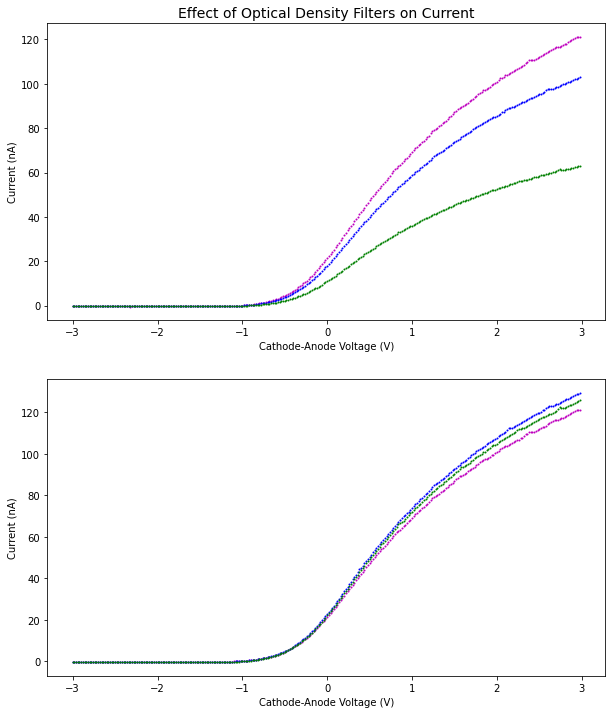

In [61]:
plt.figure(figsize=(10,12)) #use of plot like this is to show that runs with the same wavelength produce almost the same stopping voltage regardless of the intensity.
# plots should contain data from runs with the same wavelength but different optical filter

plt.subplot(2,1,1)
plt.title('Effect of Optical Density Filters on Current',fontsize=14)
#plt.scatter(day2Runs[1][:,0],day2Runs[2][:,1],s=1,color='blue') different lamp positioning in the box so probably shoulndt use the first set of no filter for this because the intensity is lower because of that
plt.scatter(day2Runs[7][300:600,0],day2Runs[8][300:600,1],s=1,color='m')
plt.scatter(day2Runs[14][300:600,0],day2Runs[15][300:600,1],s=1,color='blue')
plt.scatter(day2Runs[21][300:600,0],day2Runs[22][300:600,1],s=1,color='green')
plt.xlabel('Cathode-Anode Voltage (V)')
plt.ylabel('Current (nA)')


plt.subplot(2,1,2)
plt.scatter(day2Runs[7][300:600,0],day2Runs[8][300:600,1],s=1,color='m')
plt.scatter(day2Runs[14][300:600,0],day2Runs[15][300:600:,1]/(10**(-.1)),s=1,color='blue')
plt.scatter(day2Runs[21][300:600,0],day2Runs[22][300:600,1]/(10**(-.3)),s=1,color='green')

plt.xlabel('Cathode-Anode Voltage (V)')
plt.ylabel('Current (nA)')


In [21]:
means=[]
std=[]
for i in range(0,len(day2Runs)):
    means.append(np.mean(day2Runs[i][10:300,1]))
    std.append(np.std(day2Runs[i][10:300,1]))
#for i in range(0,len(means)):
#print(means[i],std[i])

In [22]:
Vs=np.zeros(27)
for i in range(0,27):
    for j in range(0,len(day2Runs[i])):
        if np.abs(day2Runs[i][j,1]-means[i])<2*std[i]:
            Vs[i]=day2Runs[i][j,0]
print(Vs[0:6],waveday2[0:6])
print(Vs[6:13],waveday2[6:13])
print(Vs[13:20],waveday2[13:20])
print(Vs[20:27],waveday2[20:27])


[-2.88 -1.5  -1.24 -1.12 -0.64  0.08] [254, 365, 405, 435, 543, 694]
[-2.72 -1.58 -1.26 -1.1  -0.62  0.04 -0.6 ] [254, 365, 405, 435, 543, 694, 550]
[ 3.   -1.08 -1.28 -1.14 -0.64 -0.56  0.12] [254, 365, 405, 435, 543, 550, 694]
[ 3.   -1.22 -1.2  -1.1  -0.6  -0.52 -0.08] [254, 365, 405, 435, 543, 550, 694]


-6.098011525838732e-34
2.90606134103533e-35
-5.696669671935063e-34
2.672515585400416e-35
-5.224272914554971e-34
-4.9568702928517475e-34
2.5381445500916413e-19



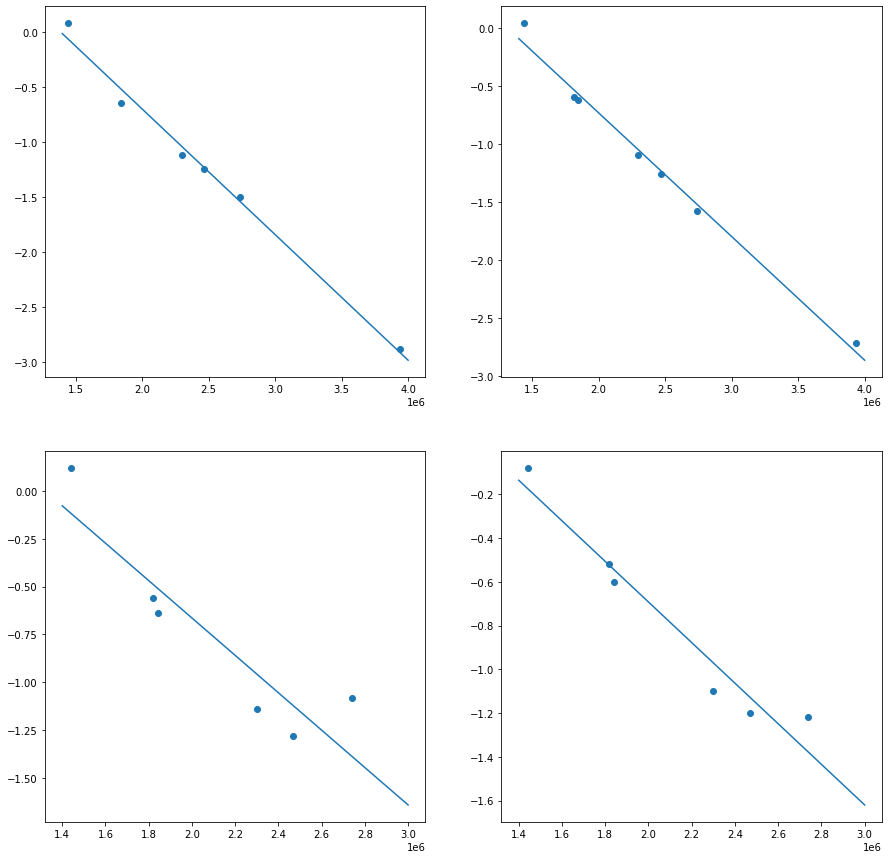

In [37]:
#these plots and fits exclude day2runs 14,21 (wavelength 254)

plt.figure(figsize = (15,15))
plt.subplot(2,2,1)
xplot=np.linspace(1.4e6,4e6,100)
yplot=np.zeros(100)
slope1,intercept1,rval1,pval1,stdslope1=scipy.stats.linregress(invwaveday2[0:6],Vs[0:6])
for i in range(0,100):
    yplot[i]=xplot[i]*slope1+intercept1
plt.plot(xplot,yplot)
plt.scatter(invwaveday2[0:6],Vs[0:6])

plt.subplot(2,2,2)
plt.scatter(invwaveday2[6:13],Vs[6:13])
xplot=np.linspace(1.4e6,4e6,100)
yplot=np.zeros(100)
slope2,intercept2,rval2,pval2,stdslope2=scipy.stats.linregress(invwaveday2[6:13],Vs[6:13])
for i in range(0,100):
    yplot[i]=xplot[i]*slope2+intercept2
plt.plot(xplot,yplot)

plt.subplot(2,2,3)
plt.scatter(invwaveday2[14:20],Vs[14:20])
xplot=np.linspace(1.4e6,3e6,100)
yplot=np.zeros(100)
slope3,intercept3,rval3,pval3,stdslope3=scipy.stats.linregress(invwaveday2[14:20],Vs[14:20])
for i in range(0,100):
    yplot[i]=xplot[i]*slope3+intercept3
plt.plot(xplot,yplot)


plt.subplot(2,2,4)
plt.scatter(invwaveday2[21:27],Vs[21:27])
xplot=np.linspace(1.4e6,3e6,100)
yplot=np.zeros(100)
slope4,intercept4,rval4,pval4,stdslope4=scipy.stats.linregress(invwaveday2[21:27],Vs[21:27])
for i in range(0,100):
    yplot[i]=xplot[i]*slope4+intercept4
plt.plot(xplot,yplot)


print(slope1*e/c)
print(stdslope1*e/c)
print(slope2*e/c)
print(stdslope2*e/c)
print(slope3*e/c)
print(slope4*e/c)

print(intercept1*e)
print()


Text(0, 0.5, 'Stopping Voltage (V)')

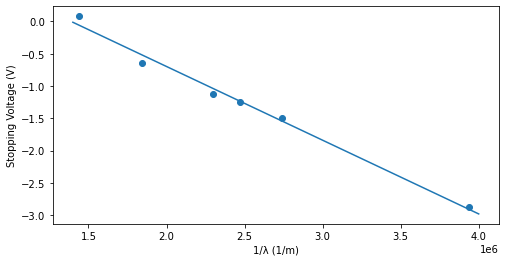

In [33]:
plt.figure(figsize = (8,4))
xplot=np.linspace(1.4e6,4e6,100)
yplot=np.zeros(100)
slope1,intercept1,rval1,pval1,stdslope1=scipy.stats.linregress(invwaveday2[0:6],Vs[0:6])
for i in range(0,100):
    yplot[i]=xplot[i]*slope1+intercept1
plt.plot(xplot,yplot)
plt.scatter(invwaveday2[0:6],Vs[0:6])
plt.xlabel('1/\u03BB (1/m)')
plt.ylabel('Stopping Voltage (V)')

In [ ]:
intercepts = [fit2[0][1],fit3[0][1],fit4[0][1],fit5[0][1],fit6[0][1],fit7[0][1]]
interceptsOD1 = [fit9[0][1],fit10[0][1],fit11[0][1],fit12[0][1],fit14[0][1]]
wavelengths = [543,365,435,694,254,405]
invwaves = [1000000000/543,1000000000/365,1000000000/435,1000000000/694,1000000000/254,1000000000/405]
invwaves2 = [1000000000/543,1000000000/365,1000000000/435,1000000000/694,1000000000/405]

In [35]:
scipy.stats.linregress(invwaveday2[0:6],Vs[0:6])

LinregressResult(slope=-1.1411597155078177e-06, intercept=1.5843598939398509, rvalue=-0.9954885477968702, pvalue=3.0483890224983085e-05, stderr=5.438297581321834e-08, intercept_stderr=0.1401620292654576)

2.885596274740174e-35